In [1]:
#hiddencell
from pbl_tools import *

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

import micropip
await micropip.install('seaborn')

# 스테이지 3. 데이터 시각화 및 분포 탐색
## 도입
스테이지 3에서는 탐색적 데이터 분석(EDA, Exploratory Data Analysis)을 통해 데이터를 깊이 있게 이해하는 방법에 대해 배웁니다. EDA는 데이터 사이언스 프로젝트의 핵심 부분으로, 데이터의 기본적인 정보를 파악하고, 각 피처의 분포를 확인하며, 피처들 간의 연관성을 탐색하는 과정입니다.

이 과정에서 데이터의 특성을 깊이 있게 이해하면서 데이터 분석에 필요한 통찰력을 기를 수 있습니다.

## 학습 목표
- 주어진 인구 소득 예측 문제에서 타겟 변수의 클래스 별 빈도를 시각화하여 불균형 여부를 확인합니다.
- 각 피처의 분포를 확인하여 데이터 전반적인 형태에 대한 이해를 합니다.
- 각 피처와 타겟 변수 간의 관계를 살펴보기 위해 타겟 클래스 별 빈도를 시각화합니다.
- 주요 범주형 변수들에 대한 분포 및 연관성을 시각화하여 파악합니다.
- 수치형 변수들간 상호작용 및 관계를 시각화하여 이해합니다.

# 1. pandas를 이용해 csv 파일 읽어오기
[문제 1]  
`Pandas` 라이브러리(library)를 가져와보세요.  
그리고 `train.csv`, `test.csv`, `sample_submission.csv` 파일을 각각 train, test, submission 변수로 읽어오세요.  
아래 빈칸을 채워주세요.  

In [2]:
import pandas as pd  

train = pd.___('train.csv')  
test = pd.___('test.csv')  
submission = pd.___('sample_submission.csv')

In [3]:
#checkcode
ensure_vals(globals(), 'train', 'test', 'submission')
@check_safety
def check(
    user_train: pd.DataFrame,
    user_test: pd.DataFrame,
    user_submission: pd.DataFrame
):
    c_point1 = hasattr(user_train, 'tail')
    c_point2 = hasattr(user_test, 'tail')
    c_point3 = hasattr(user_submission, 'tail')

    if c_point1 and c_point2 and c_point3:
        return True
    else:
        return False

check(train, test, submission)

True

### Inst.  


### Hint.
`pd.read_csv('파일경로/파일명')` 를 활용해 보세요.

### Solution.
```python
import pandas as pd  

train = pd.read_csv('train.csv')  
test = pd.read_csv('test.csv')  
submission = pd.read_csv('sample_submission.csv')
```

# 2.시각화에 필요한 라이브러리 불러오기

데이터 시각화는 데이터를 이해하고 다른 사람에게 전달하기 위한 강력한 도구입니다.   
이를 위해서는 그래프와 차트를 생성하는 데 필요한 라이브러리를 불러와야 합니다.   

데이터 분석에서 가장 먼저 해야 할 일은 **어떤 데이터가 주어졌고, 어떤 방식으로 활용할 수 있을지 파악하고 시각화** 하여 인사이트를 얻어 내는 작업입니다.   
이러한 작업은 `EDA(Exploratory Data Analysis, 탐색적 자료 분석)`라고도 불리며,   
수집한 데이터를 분석하기 전에 **데이터의 특성을 관찰하고 이해** 하는 단계입니다.
   
EDA는 모든 데이터 분석 작업에서 가장 중요한 부분으로,   
데이터를 살펴보고 그 특성을 시각화하여 데이터에 숨겨진 정보와 패턴을 발견하는 과정입니다.

In [4]:
# 시각화에 필요한 라이브러리 Import
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.font_manager as fm

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 그래프 스타일 설정
plt.style.use("ggplot")

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

In [80]:
#checkcode
#empty

### Inst.

> **라이브러리 Import**

- `Seaborn` 은 matplotlib 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지입니다.   
복잡한 그래프를 간단하게 만들 수 있어 많은 사람들이 선호합니다.  
- `Matplotlib` 은 파이썬에서 2D 형태의 그래프, 이미지 등을 그릴 때 사용되는 대표적인 패키지입니다.   
pyplot은 matplotlib의 서브패키지로, 간단하게 그래프를 생성하고 수정하는 함수들을 제공합니다.

> **불필요한 경고 메시지 무시**

Python에서 경고 메시지를 관리하기 위해 사용되는 내장 모듈입니다.   
경고 메시지가 출력되지 않도록 설정하여 코드 실행 결과가 깔끔하게 보일 수 있도록 합니다.

> **그래프 스타일 설정**

Matplotlib에 내장된 스타일 중 `ggplot` 스타일을 적용하는 코드입니다.  
`ggplot` 스타일은 R 언어의 ggplot2 패키지에서 영감 받아 만든 스타일로, 보다 세련된 디자인의 그래프를 생성할 수 있습니다.

> **한글 폰트 설정**

한글을 사용하는 경우, 한글 폰트를 설정해야 합니다. 이를 위해 `matplotlib.font_manager`를 사용하여 한글 폰트 파일을 불러온 후,   
`plt.rc`를 통해 한글 폰트를 설정합니다. 이렇게 설정하면 그래프에 한글이 제대로 표시됩니다.

따라서 위와 같은 코드 작성으로 필요한 라이브러리와 설정들을 준비하여 원활하게 데이터 분석과 시각화 과정에 집중할 수 있는 환경 조성이 가능합니다.

### Hint.

empty  

### Solution.

empty

# 3.Target의 분포

소득 수준(target)에 따른 데이터의 분포를 시각화로 표현하여 확인하는 것은 중요한 요인입니다.   
target의 분포를 확인하려는 이유는 다음과 같습니다

> **데이터 이해** 

데이터를 시각적으로 표현하면 데이터의 특성과 패턴을 빠르게 파악할 수 있습니다.   
소득 수준에 따른 데이터 분포를 보면 어떤 소득 수준이 주로 나타나는지, 클래스 간 불균형이 있는지 등을 파악할 수 있습니다.

> **클래스 분포 확인**

분류 문제에서는 각 클래스의 데이터 분포를 확인하는 것이 중요합니다. 이를 통해 불균형한 클래스 분포를 감지하고 조치를 취할 수 있습니다.   
예를 들어, 한 클래스가 다른 클래스에 비해 훨씬 많은 데이터를 가지고 있는 경우, 모델 학습 결과가 편향될 수 있으므로 주의가 필요합니다.

> **모델 평가 준비** 

모델을 평가할 때, 클래스별 정확도, 정밀도, 재현율 등의 지표를 계산하는 데에도 클래스 분포 정보가 필요합니다.   
시각화를 통해 각 클래스의 데이터 수를 파악하면 모델 평가를 준비하는 데 도움이 됩니다.

> **결정 기준 제공** 

시각화는 의사결정에 도움이 됩니다. 데이터 분포를 보고 소득 수준에 따라 어떤 특성들이 중요한지, 어떤 클래스가 더 예측하기 어려운지 등을 판단할 수 있습니다.   
이를 통해 모델 개선 또는 추가 조치를 취할 수 있습니다.

소득 수준(target)에 따른 데이터 분포를 막대 그래프로 시각화 해보도록 하겠습니다.

[문제 2]

- `seaborn`의 `countplot` 함수를 사용하여 `소득 수준(target)`에 따른 데이터의 분포를 막대 그래프로 그려주세요.    
x 축은 `target` 열(column)의 값을 나타내며, 데이터는 `train` 데이터프레임(DataFrame)에서 가져옵니다.

- `set_xticklabels` 함수를 사용하여 x 축 레이블(label)을 `x <= 50`과 `x > 50`으로 설정해주세요.   
이렇게 하면 그래프의 x 축에 표시되는 눈금 레이블이 변경됩니다.

- `set_title` 함수를 사용하여 그래프의 제목을 `Distribution of Income Levels` 으로 설정해주세요.  
이 경우, `Distribution of Income Levels`이라는 제목이 그래프 상단에 표시됩니다.

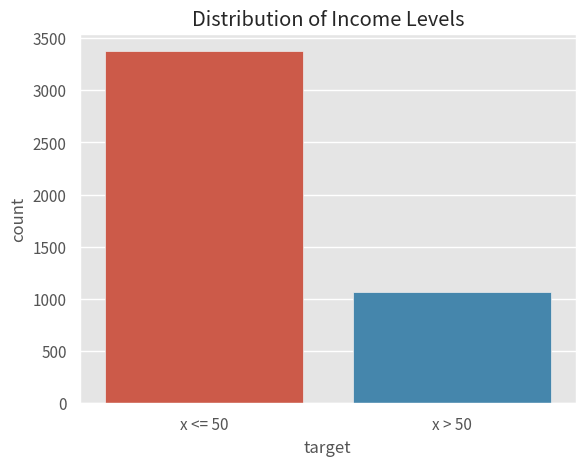

In [81]:
# 소득 수준(target)에 따른 데이터 분포를 막대 그래프로 시각화합니다.
axs = sns.___(x="target", data=train)

# x 축 레이블과 눈금 설정
axs.___(labels = ["x <= 50", "x > 50"])

# 그래프 제목 설정
axs.___("Distribution of Income Levels")

# 그래프 표시
plt.show()

In [13]:
#checkcode
ensure_vals(globals(), 'axs')
@check_safety
def check(
    object:pd.DataFrame,
    x_value:str,
    y_value:str
):
    c_point1 = object.get_xlabel() == x_value
    c_point2 = object.get_ylabel() == y_value
    
    if c_point1 and c_point2:
        return True
    else:
        return False
    
check(axs, 'target','count')

True

### Inst.
`seaborn` 라이브러리의 `countplot` 함수는 **범주형 데이터의 빈도수(또는 카운트)** 를 시각화하는 데 사용되는 함수입니다.   
이 함수는 막대 그래프(bar plot)를 생성하여 각 범주의 데이터 개수를 시각적으로 표현합니다.   
주로 데이터셋의 클래스 분포를 확인하거나 범주형 변수의 빈도를 시각화할 때 사용됩니다.

```python
`countplot` 함수에 대한 주요 매개변수와 기능은 다음과 같습니다.

- `x`: x 축에 표시할 `범주형 변수` 를 지정합니다. 데이터프레임의 열 이름이나 배열 형태로 전달됩니다.
- `data`: 시각화할 데이터가 포함된 데이터프레임을 지정합니다.
- `hue` (선택 사항): 추가적인 범주형 변수를 지정하여 데이터를 더 `세분화` 하고 다중 범주에 대한 빈도를 표현할 수 있습니다.
- `order` (선택 사항): 범주의 `순서를 지정` 할 수 있는 리스트 또는 배열을 지정합니다.
- `palette` (선택 사항): 그래프의 `색상` 팔레트를 지정할 수 있습니다.
```

---

#### 결과 해석

- `x <= 50`: 약 3,300개의 데이터가 해당 범주에 속합니다. 이는 소득 수준이 50 이하인 사람들의 수를 나타냅니다.
- `x > 50`: 약 1,100개의 데이터가 해당 범주에 속합니다. 이는 소득 수준이 50을 초과하는 사람들의 수를 나타냅니다.
- 이 분포는 불균형한 형태를 보여줍니다. 클래스 0 (소득 수준이 50 이하)의 데이터가 클래스 1 (소득 수준이 50을 초과)에 비해 훨씬 많습니다.  

따라서, 클래스 간 데이터의 불균형이 존재합니다.   
이러한 불균형한 데이터로 인해 모델 학습 결과에 편향이 발생할 가능성이 있습니다.  
따라서, 불균형한 데이터 문제를 해결하기 위해 적절한 조치를 취할 필요가 있습니다.  

위 결과 해석을 통해 우리는 주어진 데이터셋에서 소득 수준(target)과 관련된 정보를 얻을 수 있으며,   
클래스 간 불균형 문제에 대비하여 조치를 취할 필요성을 인지할 수 있습니다.

### Hint.

empty  

### Solution.

```python
# 소득 수준(target)에 따른 데이터 분포를 막대 그래프로 시각화합니다.
axs = sns.countplot(x="target", data=train)

# x 축 레이블과 눈금 설정
axs.set_xticklabels(labels = ["x <= 50", "x > 50"])

# 그래프 제목 설정
axs.set_title("Distribution of Income Levels")

# 그래프 표시
plt.show()
```

# 4.교육수준(education)의 분포

교육 수준을 나타내는 `education` 피처(Feature)와 해당 교육 수준을 번호로 표현한 `education.num` 피처는 같은 정보를 담고 있는 것으로 예상됩니다.

각 교육 수준에 대한 count(빈도)를 표현하여 `education`, `education.num` 피처간의 관계를 비교해보겠습니다.   
만약 두 피처가 동일한 정보를 담고 있다면, 그래프 상에서 유사한 패턴이 나타날 것으로 예상됩니다.

[문제 3]  

`plt.subplots()` 함수를 사용하여 두 개의 서브플롯을 생성해보세요.    
`figsize` 매개변수를 사용하여 가로 12인치, 세로 4인치의 크기로 그림을 생성하고,   
`ncols=2`로 두 개의 열(column)을 가진 서브플롯을 생성합니다.      

> 첫 번째 subplot (`axs[0]`) 
   
- x축에 표시할 데이터의 열 이름은 `education` 입니다.   
   사용할 데이터프레임은 `train` 입니다.   
   그래프에 표시될 범주형 값들의 순서(`order`)를 `orders` 로 지정해주세요.    
   첫 번째 서브플롯(`axs[0]`)에 그려주세요.

- x축 레이블(`labels`)의 이름은 `orders`로 설정해주세요.   
   회전 각도(`rotation`)를 레이블들이 겹치지 않게 `45`도로 회전시켜주세요.

- `education`으로 제목을 설정해주세요.

> 두 번째 subplot (`axs[1]`)
- x축에 표시할 데이터의 열 이름은 `education.num` 입니다.   
   사용할 데이터 프레임은 `train` 입니다.      
   첫 번째 서브플롯(`axs[1]`)에 그려주세요.

- `education.num`으로 제목을 설정해주세요.

`plt.tight_layout()` 함수를 사용하여 subplot 간의 간격을 조정해 보세요.

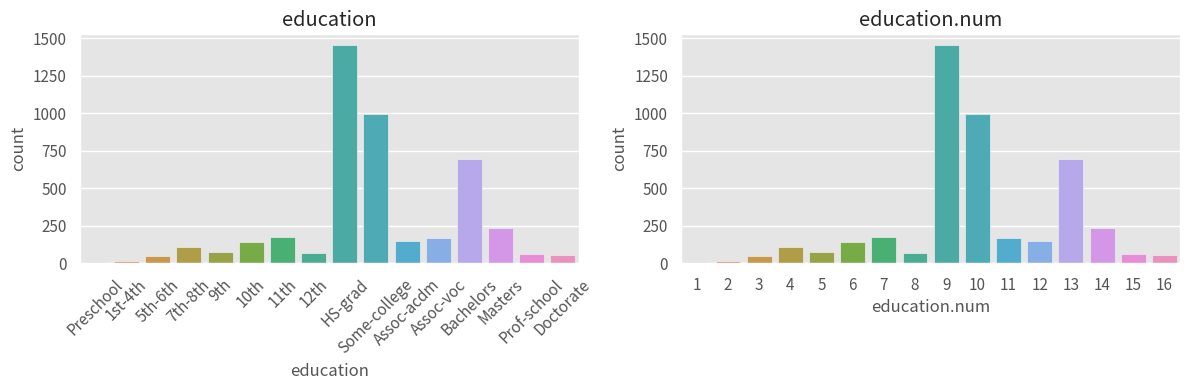

In [83]:
# 그림 크기 설정
fig, axs = plt.___(___=(12, 4), ___=2)

orders = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
'HS-grad','Some-college','Assoc-acdm','Assoc-voc','Bachelors','Masters','Prof-school','Doctorate']

# 첫 번째 subplot: education 카테고리 시각화
sns.countplot(x="___", data=train, order=___, ax=___)
axs[0].___(labels = ___, rotation=___)
axs[0].set_title('___')

# 두 번째 subplot: education.num 카테고리 시각화
sns.countplot(___="education.num", ___=train, ___=axs[1])
axs[1].___('education.num')

# subplot 간 간격 조정
plt.___()

plt.show()

In [19]:
#checkcode
ensure_vals(globals(), 'axs')
@check_safety
def check(
    axs_A:pd.DataFrame,
    axs_B:pd.DataFrame,
    A_value:str,
    AB_value:str,
    y_value:str,
    text_value:str
):
    c_point1 = axs_A.get_xlabel() == A_value 
    c_point2 = axs_B.get_xlabel() == AB_value
    c_point3 = axs_A.get_ylabel() == y_value
    c_point4 = axs_B.get_ylabel() == y_value
    c_point5 = axs_A.get_title() == A_value
    c_point6 = axs_B.get_title() == AB_value
    c_point7 = axs_A.get_xticklabels()[1].get_text() == text_value # orders 때문에 넣
    
    if (c_point1 
    and c_point2
    and c_point3
    and c_point4
    and c_point5
    and c_point6
    and c_point7
    ):
        return True
    else:
        return False
        
check(axs[0], axs[1], 'education','education.num','count','1st-4th')

True

### Inst.
두 개의 서브플롯(subplot)을 생성하고 각각 다른 카테고리 데이터를 시각화하는 작업을 수행합니다.

plt.subplots() 함수를 사용하여 두 개의 서브플롯을 생성합니다.       
figsize 매개변수로 그림의 크기를 설정하고, ncols=2로 두 개의 열(column)을 가진 서브플롯을 생성합니다.       
fig는 전체 그림 객체를 나타내고, axs는 각각의 서브플롯을 나타내는 배열입니다.

> 첫 번째 subplot (axs[0])

```python
sns.countplot(x="education", data=train, order=orders, ax=axs[0])
axs[0].set_xticklabels(orders, rotation=45)
axs[0].set_title('education')
```

- "education" 열의 카테고리 데이터를 시각화합니다. order 매개변수로 x 축의 범주 순서를 지정합니다.
- x 축 눈금 레이블을 지정된 순서(orders)로 설정하고 45도로 회전하여 표시합니다.    
- 첫 번째 subplot에 제목을 설정합니다.


> 두 번째 subplot (axs[1]):

```python
sns.countplot(x="education.num", data=train, ax=axs[1])
axs[1].set_title('education.num')
plt.tight_layout()
```

- "education.num" 열의 카테고리 데이터를 시각화합니다.  
- 두 번째 subplot에 제목을 설정합니다.
- subplot 간의 간격을 조정합니다.  

`plt.show()`: 그림을 표시합니다.

`education`과 `education.num` 열의 카테고리 데이터를 서로 다른 방식으로 시각화하여 교육 수준을 나타내는 데이터의 분포를 비교하고자 합니다.  
첫 번째 subplot에서는 특정 순서(`orders`)로 교육 수준을 나타내고,   
두 번째 subplot에서는 `education.num` 열의 카테고리 데이터를 표시합니다.     

---

#### 결과 해석

- 첫 번째 subplot(`education`):

`Preschool`, `1st-4th`, `5th-6th` 등 각 교육 수준(education) 카테고리에 대한 막대 그래프가 표시되어 있습니다.  
각 막대의 높이는 해당 교육 수준 카테고리에 속하는 사람들의 수를 나타냅니다.  
그래프를 보면 `HS-grad`와 `Some-college` 교육 수준에 속하는 사람들이 많은 것을 알 수 있습니다.  
이 그래프를 통해 데이터셋 내 교육 수준의 분포를 확인할 수 있습니다.  

- 두 번째 subplot(`education.num`):

`education.num`은 교육 수준을 숫자로 나타낸 것으로, 숫자가 높을수록 높은 교육 수준을 나타냅니다.  
이 subplot은 교육 수준을 숫자로 표시한 데이터의 분포를 보여줍니다.  
가장 높은 교육 수준을 나타내는 숫자는 몇 개 없는 것으로 보입니다.  

위 결과 해석을 통해 education와 education.num 변수 간에 일치하는 패턴이 있다는 것도 확인할 수 있습니다.

### Hint.

- `set_xticklabels` 함수를 사용하여 x 축 레이블을 설정할 수 있습니다.
- `set_title` 함수를 사용하여 그래프의 제목을 설정할 수 있습니다.

### Solution.

```python
# 그림 크기 설정
fig, axs = plt.subplots(figsize=(12, 4), ncols=2)

orders = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
'HS-grad','Some-college','Assoc-acdm','Assoc-voc','Bachelors','Masters','Prof-school','Doctorate']

# 첫 번째 subplot: education 카테고리 시각화
sns.countplot(x="education", data=train, order=orders, ax=axs[0])
axs[0].set_xticklabels(labels = orders, rotation=45)
axs[0].set_title('education')

# 두 번째 subplot: education.num 카테고리 시각화
sns.countplot(x="education.num", data=train, ax=axs[1])
axs[1].set_title('education.num')

# subplot 간 간격 조정
plt.tight_layout()

plt.show()

```


# 5.교육 수준(education)에 따른 소득 수준(target) 분포

`education` 피처(feature)는 개인의 교육 수준을 나타냅니다.   
일반적으로, 교육 수준이 비슷한 사람들은 연 소득도 비슷할 것이라는 예상을 할 수 있습니다.   
이는 높은 교육 수준이 보다 좋은 직업 기회를 제공하고, 따라서 더 높은 소득을 가져올 가능성이 있다는 일반적인 인식에 기반한 것입니다. 

그러나, 이러한 가정이 항상 실제와 일치하지 않을 수 있습니다.   
따라서 우리의 가설이 실제 데이터와 어떻게 일치하는지 확인하는 것이 중요합니다.

이 가설을 검증하기 위해 `education` 피처와 연 소득(target) 간의 관계를 시각화하고 분석해보겠습니다.  

[문제 4]  
  
- 그림의 크기를 (8,4)로 설정해주세요. 

- x축에 표시할 데이터의 열 이름은 `education` 입니다.   
   사용할 데이터프레임은 `train` 입니다.      
   `hue` 인자를 사용하여 `target` 열의 값을 기준으로 데이터를 두 개의 그룹으로 나누어 보세요.
    그래프에 표시될 범주형 값들의 순서를 `orders` 로 지정해주세요.     
   `palette` 인자를 사용하여 `target`의 카테고리에 따라 `파란색과 녹색`을 사용하여 색상을 지정해 보세요.
 
- `target X education`으로 제목을 설정해주세요.

- x축 레이블의 이름은 `orders`로 설정해주세요.      
  회전 각도를 레이블들이 겹치지 않게 `45`도로 회전시켜주세요.

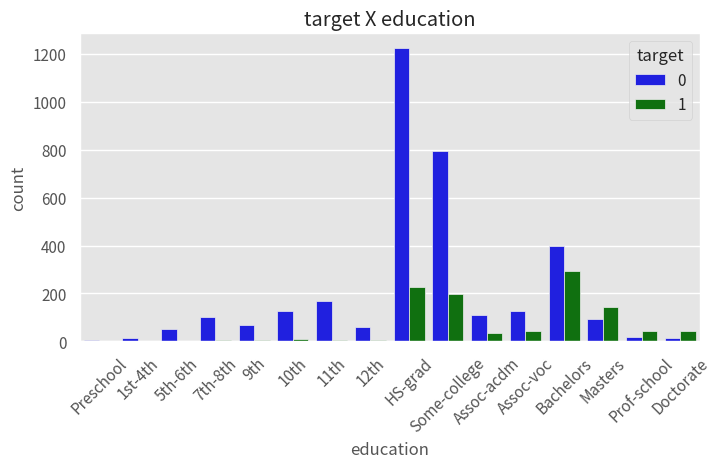

In [85]:
plt.subplots(___=(8, 4))

orders = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
'HS-grad','Some-college','Assoc-acdm','Assoc-voc','Bachelors','Masters','Prof-school','Doctorate']
palette_used = ['blue', 'green']

axs = sns.countplot(___="education", ___=train, hue='target', ___=orders, ___=palette_used)
axs.___('target X education')
axs.___(___ = orders, ___=45)  
plt.show()

In [21]:
#checkcode
ensure_vals(globals(), 'axs')
@check_safety
def check(
    xlabel:str,
    method,
    title:str,
    xticklabels:str,
    ylim:float
):
    c_point1 = axs.get_xlabel() == xlabel
    c_point2 = axs.get_ylabel() == method
    c_point3 = axs.get_title() == title
    c_point4 = axs.get_xticklabels()[1].get_text() == xticklabels
    c_point5 = axs.get_ylim() == ylim
    
    if (c_point1 
    and c_point2
    and c_point3
    and c_point4
    and c_point5
    ):
        return True
    else:
        return False
        
check('education', 'count','target X education','1st-4th',(0.0, 1285.2))

True

### Inst.

`hue` 인자는 seaborn의 `countplot()` 함수에서 사용되는 인자 중 하나입니다.   
`hue`를 설정하면 데이터를 추가적인 범주형 변수로 분할하여 각 범주에 대한 카운트를 표시할 수 있습니다.

해당 코드에서 `hue='target'`로 설정되어 있으므로, 'target' 열의 값을 기준으로 데이터가 두 개의 그룹으로 나뉘어집니다.   
그래프에서는 'target'이 다른 그룹 간에 각각의 범주('education')에 대한 카운트를 보여줍니다.

예를 들어, 위 코드에서는 'education'을 x축으로 하고, 해당 학력 수준에 따른 인원 수(count)를 표시하고 있습니다.   
이때 `hue='target'`을 설정함으로써 'target' 값이 0과 1인 두 개의 그룹으로 데이터가 나뉘어지며, 각 학력 수준별로 이 두 그룹의 인원 수가 시각화됩니다.

즉, 위 코드는 학력 수준별로 'target' 값(예: 소득이 50K 이상인지 아닌지)에 따른 분포 차이를 보여주기 위해 hue 기능을 활용하고 있는 것입니다.   
파란색과 초록색 막대는 각각 target 값이 0과 1인 데이터 포인트들을 나타내며, 해당 학력 수준별로 카운트된 결과가 시각화됩니다.

이를 통해 교육 수준과 소득 수준 간의 관계를 시각적으로 확인할 수 있습니다.

---

#### 결과 해석


- 'Preschool', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th' 등 낮은 교육 수준을 가진 사람들의 경우,   
연 소득이 50만 달러를 초과하는 비율이 매우 낮습니다. 이는 교육 수준이 낮을수록 연 소득도 낮을 가능성이 높다는 것을 보여줍니다.

- 고등학교 졸업자('HS-grad')와 일부 대학 과정 이수자('Some-college')의 경우도 연 소득이 50만 달러를 초과하는 비율이 약간 증가하였습니다.     
전체 인구 중 상당 부분(약 18% ~19%)이 해당 범주에 포함되며, 그 중 일부가 높은 수입을 얻고 있는 것으로 파악됩니다.

- 'Assoc-acdm'와 'Assoc-voc' 범주에서는 전문 학사 학위를 가진 사람들 중 약 34% ~ 35%가 연 소득이 50만 달러를 초과합니다.   
이는 해당 직업 분야에 대한 교육 및 훈련이 일부 높은 수입 기회를 제공한다는 것을 시사합니다.

- 높은 교육 수준인 'Bachelors', 'Doctorate', 'Masters' 및 'Prof-school' 범주에서는 연 소득이 50만 달러를 초과하는 비율이 상대적으로 높습니다.   
특히, 전문 대학원 학위나 박사 학위('Doctorate')를 가진 사람들 중 약 3배 이상(약 330%)의 비율로 높은 연봉을 받고 있는 것으로 나타납니다.

따라서, 위 결과는 교육 수준별로 연 소득 분포의 차이를 보여주며, 일반적으로 교육 수준이 높아질수록 높은 연봉 기회가 증가한다는 경향성을 확인할 수 있습니다.

### Hint.
- figsize 메소드를 사용하면 그림의 크기를 설정할 수 있습니다.
- x 인자에는 x 축에 표시할 범주형 변수 를 지정합니다. 
- data 인자에는 시각화할 데이터가 포함된 데이터프레임을 지정합니다.
- order 인자에는 범주의 순서를 지정 할 수 있는 리스트 또는 배열을 지정합니다.
- set_title 함수를 사용하여 그래프의 제목을 설정할 수 있습니다.
- set_xticklabels 함수를 사용하여 x 축 레이블을 설정할 수 있습니다.
- labels 인자에는 설정할 x 축 레이블의 이름을 적어보세요.
- rotation 인자를 설정하면 레이블들이 겹치지 않게 회전시킬 수 있습니다.

### Solution.
```python
plt.subplots(figsize=(8, 4))

orders = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
'HS-grad','Some-college','Assoc-acdm','Assoc-voc','Bachelors','Masters','Prof-school','Doctorate']
palette_used = ['blue', 'green']

axs = sns.countplot(x="education", data=train, hue='target', order=orders, palette=palette_used)
axs.set_title('target X education')
axs.set_xticklabels(labels = orders, rotation=45)  
plt.show()
```

# 6.결혼 상태(marital.status)의 분포

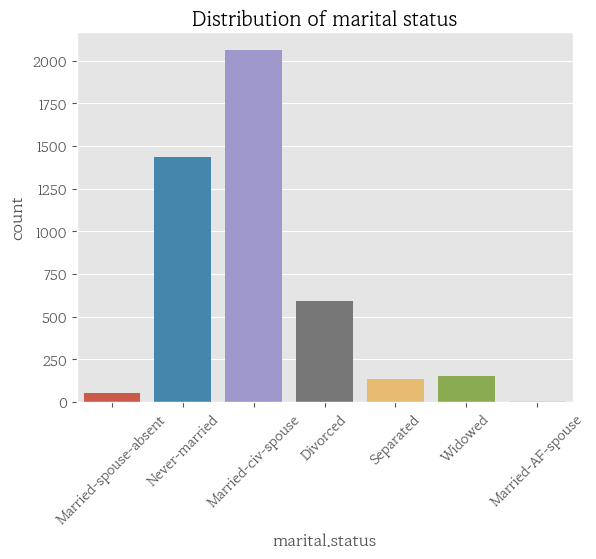

In [22]:
sns.countplot(x="marital.status", data=train)
plt.xticks(rotation=45)
plt.title('Distribution of marital status')
plt.show()

In [88]:
#checkcode
#empty

### Inst.

---

#### 결과 해석

- "Married-civ-spouse" 범주에 해당하는 사람들이 가장 많으며, 이들은 현재 배우자와 함께 사는 사람들을 의미합니다.
- "Never-married" 범주에 해당하는 사람들이 그 다음으로 많으며, 이들은 결혼한 적이 없는 사람들을 의미합니다.
- "Divorced" 범주에 해당하는 사람들은 이혼한 사람들로, 전체의 약 594명입니다.
- "Widowed", "Separated", "Married-spouse-absent", 그리고 "Married-AF-spouse" 범주에 속하는 인원 수가 상대적으로 적습니다.

위의 countplot 시각화에서도 같은 정보가 표시됩니다. 각기 다른 막대는 각 결혼 상태를 나타내며, 막대의 높이는 해당 범주의 빈도수(해당 결혼 상태를 가진 인원 수)를 나타냅니다.

따라서 이 데이터셋에서 'marital.status' 변수 분포를 보면 대부분의 인원이 현재 배우자와 함께 살거나 ("Married-civ-spouse") 아직 결혼하지 않았다는 것("Never-married")을 알 수 있습니다.

### Hint.
empty

### Solution.
empty

# 7.직업(occupation)의 분포

`occupation` 피처(feature)는 개인의 직업을 나타냅니다. 직업은 사람들의 소득에 중요한 영향을 미치는 요소 중 하나입니다.   
일부 직업군은 다른 직업군에 비해 더 높은 평균 소득을 가질 수 있습니다.   
예를 들어, 전문직이나 관리직은 서비스 업종이나 수공업보다 일반적으로 더 높은 수입을 얻습니다.

따라서 이번 분석에서는 `occupation` 피처의 분포를 시각화하여 각 직업군별로 얼마나 많은 사람들이 있는지 파악하려 합니다.   
이 정보를 바탕으로 우리는 데이터셋 내에서 어떤 직업군이 가장 흔한지, 그리고 어떤 것들이 상대적으로 드문지 알아볼 수 있습니다.

occupation 분포를 시각화해 봅시다.

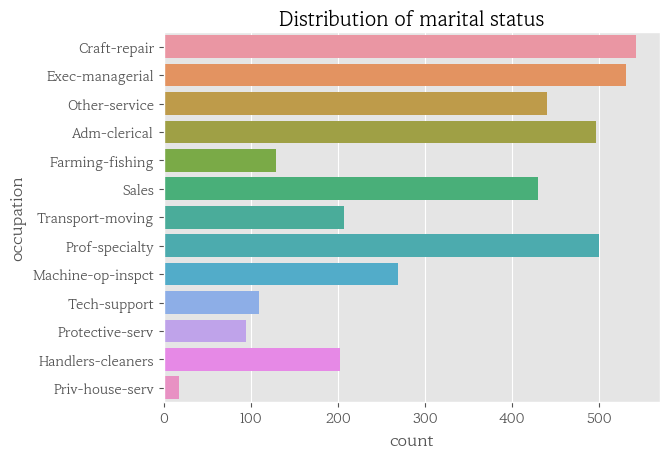

In [23]:
sns.countplot(y="occupation", data=train)
plt.title('Distribution of marital status')
plt.show()


In [ ]:
#checkcode
#empty

### Inst.

---

#### 결과 해석

- "Craft-repair" 범주에 해당하는 사람들이 가장 많으며, 이들은 수리 관련 직업을 가진 사람들을 의미합니다.
- "Exec-managerial" 범주에 해당하는 사람들이 그 다음으로 많으며, 이들은 경영 및 관리 관련 직업을 가진 사람들입니다.
- 그 후로 "Prof-specialty", "Adm-clerical", "Other-service", "Sales" 등의 범주가 뒤따릅니다. 
- 상대적으로 덜 흔한 직업군으로는 'Priv-house-serv'가 있습니다.

위의 countplot 시각화에서도 같은 정보가 표시됩니다. 각기 다른 막대는 각 직업을 나타내며, 막대의 길이는 해당 범주의 빈도수(해당 직업을 가진 인원 수)를 나타냅니다.

따라서 이 데이터셋에서 'occupation' 변수 분포를 보면 대부분의 인원이 수리 관련 작업("Craft-repair"), 경영 및 관리("Exec-managerial"), 전문직("Prof-specialty") 등의 일을 하고 있다는 것을 알 수 있습니다. 반면 개인 서비스 제공('Priv-house-serv')과 같은 일은 상대적으로 적게 나타나고 있습니다.

### Hint.
empty

### Solution.
empty

# 8. 직업 유형(workclass)의 분포

데이터셋에는 다양한 직업 유형들이 포함되어 있습니다. 각 직업 유형의 분포를 파악하기 위해, 우리는 seaborn 라이브러리의 pie 차트를 사용하여 시각화를 진행하려고 합니다. 이를 통해 각 직업이 전체 데이터셋에서 차지하는 비율을 명확하게 이해할 수 있습니다.

[문제]
- `pie` 함수를 사용하여 파이 차트를 생성해 보세요.
- `value_counts()` 함수를 사용하여 'workclass' 열에서 각 고유한 값의 빈도를 세고,   
`index` 함수를 사용하여 파이 차트의 라벨(label)로 사용할 고유값을 가져오며,   
데이터로 사용할 때는 뒤에서 2개의 항목을 제외해주세요.
- 파이 차트 안에 퍼센티지 값 소수점 첫 번째 자리 `1.1f` 까지 표시해주세요.
- `colors` 인자에는 파이 차트의 각 섹션에 색상을 지정해 주세요.

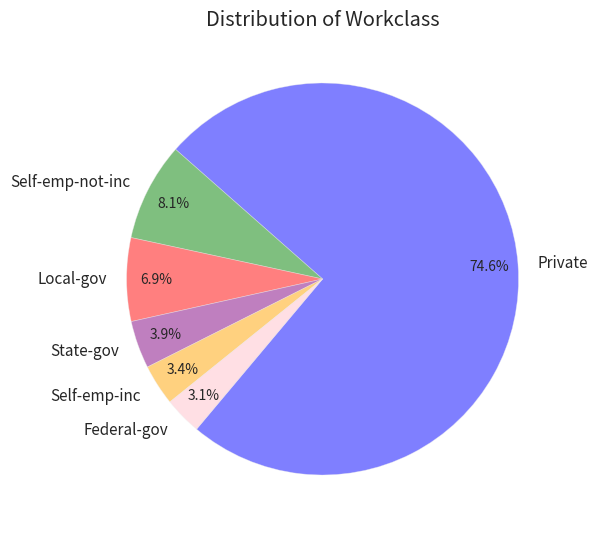

In [144]:
# 파이 차트 생성
pie_chart = plt.___(
    x=train['workclass'].value_counts().values[:-2],
    labels=train['workclass'].___().___[:___],
    autopct='%___%%',
    ___=['blue', 'green', 'red', 'purple', 'orange', 'pink'],
    startangle=230,
    pctdistance=0.85  
)

# 파이 차트의 투명도 조절
for wedge in pie_chart[0]:
    wedge.set_alpha(0.5)

# 파이 차트 크기 조절
plt.gcf().set_size_inches(7,7)

# 텍스트 레이블 자동 배치
plt.subplots_adjust(left=0.0, right=0.7)  
plt.title('Distribution of Workclass')
plt.show()


In [25]:
#checkcode
ensure_vals(globals(), 'pie_chart')
@check_safety
def check(
    object:pd.DataFrame,
    labels:list,
):

    percent_labels = [label.get_text() for label in object[1]]
    c_point1 = percent_labels == labels
    
    if c_point1:
        return True
    else:
        return False
    
check(pie_chart,['Private','Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov'])

True

### Inst.

`plt.pie()` 함수는 Matplotlib 라이브러리에서 파이 차트를 그릴 때 사용되는 함수입니다.   
이 함수는 다양한 인자를 받아 파이 차트를 생성하고 스타일, 레이블, 색상, 간격 등을 설정할 수 있습니다. 

`plt.pie()` 함수에 대한 주요 매개변수와 기능은 다음과 같습니다.

```python
- `x`: 파이 차트를 그릴 데이터를 입력합니다. 주로 리스트 또는 배열 형태로 입력하며, 각 데이터 항목의 크기에 따라 파이 차트의 크기가 결정됩니다.
- `labels`: 파이 차트의 각 부분에 대한 레이블을 설정합니다. 주로 문자열 리스트로 입력하며, 각 레이블은 데이터와 일치해야 합니다.
- `autopct` (선택 사항): 파이 차트의 각 부분에 대한 백분율 레이블을 설정합니다. 문자열 포맷을 지정하여 표시 형식을 지정할 수 있습니다. 예를 들어 `'%1.1f%%'`는 소수점 첫 번째 자리까지 표시하고 백분율로 표시합니다.
- `colors` (선택 사항): 파이 차트의 각 부분에 대한 색상을 설정합니다. 주로 색상 리스트로 입력하며, 각 데이터 항목에 대응하는 색상을 지정할 수 있습니다.
- `startangle` (선택 사항): 파이 차트의 시작 각도를 설정합니다. 기본값은 0도이며, 이 값을 변경하여 파이 차트를 회전시킬 수 있습니다.
- `pctdistance` (선택 사항): 파이 차트에서 퍼센트 레이블과 파이 차트 중심 사이의 거리를 조절하는 인자입니다. 이 값을 설정하면 퍼센트 레이블이 파이 차트의 중심에서 얼마나 떨어져 표시될지를 조절할 수 있습니다. 값은 0과 1 사이의 비율로 설정하며, 0은 가장 가깝고 1은 가장 멀리 표시됨을 나타냅니다. 값이 작을수록 레이블은 파이 차트의 중심에 가깝게 나타나고, 값이 클수록 멀리 표시됩니다.
```

---


- 'workclass' 열(column)의 고유값을 센 후, 텍스트 레이블이 파이 차트에서 겹치지 않도록 하기 위해 가장 적게 나타나는 2개의 항목을 제외한 나머지 값을 파이 차트의 데이터로 사용하였습니다.


> 파이 차트의 투명도 조절
   - `for wedge in pie_chart[0]:`: 파이 차트의 웨지(섹션)들을 순회합니다.
   - `wedge.set_alpha(0.5)`: 각 웨지의 투명도를 0.5로 설정합니다.

> 파이 차트 크기 조절
   - `plt.gcf().set_size_inches(7, 7)`: 파이 차트의 크기를 (7, 7)로 설정합니다.

> 텍스트 레이블 자동 배치
   - `plt.subplots_adjust(left=0.0, right=0.7)`: 파이 차트를 그릴 때 조절 가능한 범위를 지정합니다. 텍스트 레이블이 너무 밖으로 벗어나지 않도록 조절합니다.

해당 코드를 실행하면 'workclass' 열의 데이터를 파이 차트로 시각화하고, 퍼센티지와 색상을 지정하여 보여줍니다.

### Hint.
empty

### Solution

```python
# 파이 차트 생성
pie_chart = plt.pie(
    x=train['workclass'].value_counts().values[:-2],
    labels=train['workclass'].value_counts().index[:-2],
    autopct='%1.1f%%',
    colors=['blue', 'green', 'red', 'purple', 'orange', 'pink'],
    startangle=230,
    pctdistance=0.85  
)

# 파이 차트의 투명도 조절
for wedge in pie_chart[0]:
    wedge.set_alpha(0.5)

# 파이 차트 크기 조절
plt.gcf().set_size_inches(7,7)

# 텍스트 레이블 자동 배치
plt.subplots_adjust(left=0.0, right=0.7) 
plt.title('Distribution of Workclass')
plt.show()

```

# 9.나이(age)의 분포

데이터셋에는 다양한 나이 범위를 가진 사람들의 정보가 포함되어 있습니다.   
나이의 분포를 파악하기 위해, 우리는 seaborn 라이브러리의 displot을 사용하여 시각화를 진행하려고 합니다.   
이를 통해 데이터셋에서 어떤 연령대가 가장 많은지, 연령대별로 데이터가 어떻게 분포되어 있는지 등을 확인할 수 있습니다.

[문제 ]  
- seaborn의 `displot` 함수를 이용해서 시각화를 해보세요.  
x축에 표시할 데이터 칼럼은 `age` 입니다.  
`kde`를 `True`로 설정하여 커널 밀도 추정(Kernel Density Estimation) 그래프를 생성해 보세요.  
히스토그램의 막대 개수(`bins`)를 30개로 설정해 보세요.
- `set_titles` 함수를 사용하여 그래프의 제목을 `"0 <= 50k", "0 > 50k"`로 설정해 보세요.  

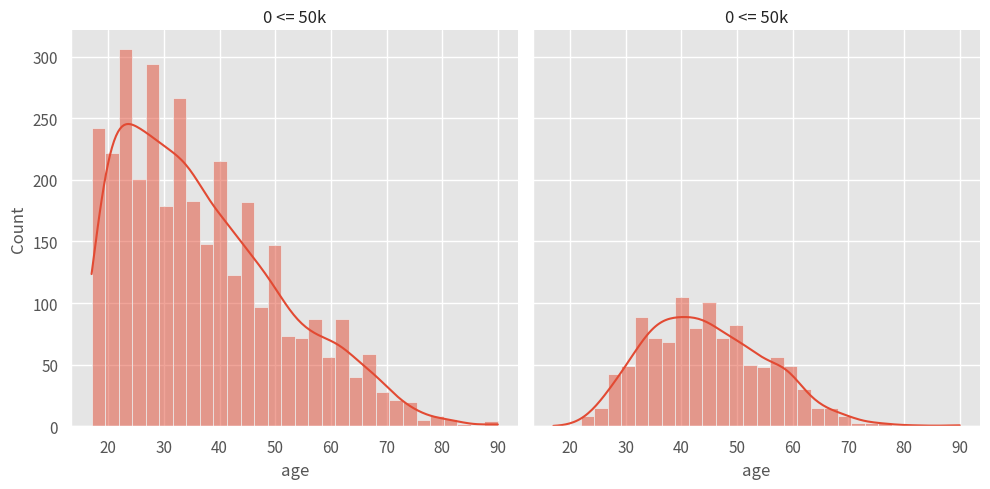

In [269]:
g = sns.___(data=train, x="age", col="target", kde=True, bins=30)
g.___("0 <= 50k", "0 > 50k")
plt.show()

In [27]:
#checkcode
ensure_vals(globals(), 'g')
@check_safety
def check(
    ylim:float,
    xlim:float,
    ylabel:str,
    xlabel:str
):
    for ax in g.axes.flat:
        c_point1 = ax.get_ylim()[1] == ylim
        c_point2 = ax.get_xlim()[1] == xlim
        c_point3 = ax.get_ylabel() == ylabel
        c_point4 = ax.get_xlabel() == xlabel
    
        if (c_point1 
        and c_point2
        and c_point3
        and c_point4
        ):
            return True
        else:
            return False
        
check(321.3,93.65,'Count','age')

True

### Inst.
displot은 Seaborn 라이브러리에서 제공하는 함수로, 주어진 데이터에 대한 분포를 시각화하는 데 사용됩니다.   
주로 히스토그램, 커널 밀도 그림, 이산 데이터 분포 등을 시각화하는 데 유용합니다.

seaborn 라이브러리를 사용하여 데이터프레임 `train`에서 "age" 열을 시각화하는 코드입니다.
   
> `sns.displot(data=train, x="age", col="target", kde=True, bins=30)`:
- `data`: 시각화할 데이터프레임을 지정합니다. 여기서는 train 데이터프레임이 사용되었습니다.
- `x`: x 축에 표시할 데이터 열을 지정합니다. 이 경우 "age" 열의 데이터가 x 축에 표시됩니다.
- `col`: 데이터를 분할하여 여러 하위 그래프(컬럼)로 나타낼 때 사용됩니다. "target" 열에 따라 데이터를 분할하고 각 하위 그래프에 표시하는데 사용되었습니다.
- `kde`: 커널 밀도 추정(Kernel Density Estimation) 그래프를 생성할지 여부를 지정합니다. True로 설정하면 KDE 그래프가 표시됩니다.
- `bins`: 히스토그램의 막대 개수를 설정합니다. 여기서는 30개의 막대로 히스토그램을 생성합니다.


> `g.set_titles("0 <= 50k", "0 > 50k")`:
   - `set_titles()`: 서브플롯의 제목을 설정하는 메서드입니다. 여기서는 두 개의 서브플롯 각각에 "0 <= 50k"와 "0 > 50k"라는 제목을 설정합니다.


`displot` 함수는 데이터의 분포를 시각화하기 위해 사용되며, 히스토그램, 커널 밀도 그래프(KDE), 러그(rug) 플롯 등 다양한 시각화 옵션을 제공합니다.   
해당 코드에서는 나이("age") 데이터를 히스토그램으로 시각화하고, "target" 열에 따라 두 개의 서브플롯으로 나눠서 표시하고 있습니다.

---

#### 결과 해석
해당 코드는 나이('age') 분포에 대한 히스토그램을 생성하고, 이를 목표 변수('target')에 따라 나눠서 보여주는 역할을 합니다.   
또한 KDE(Kernel Density Estimation) 옵션을 사용하여 각 분포의 밀도 추정 곡선도 함께 보여줍니다.

왼쪽 그래프(target=0)에서는 소득이 50K 미만인 사람들의 나이 분포를 볼 수 있습니다.   
이 경우, 나이가 증가함에 따라 사람 수(count 값)가 점차 감소하는 경향이 보입니다.   
즉, 소득이 50K 미만인 사람들 중에서는 젊은 연령대에 해당하는 사람들이 많다고 해석할 수 있습니다.

오른쪽 그래프(target=1)에서는 소득이 50K 초과인 사람들의 나이 분포를 볼 수 있습니다.   
이 경우, 나이가 증가하면서 초기에는 사람 수(count 값)가 증가하다가 특정 지점(40-50대로 추정됨)에서 최대치를 찍고 다시 감소하는 모습을 보입니다.   
이 형태는 정규분포와 유사해 보입니다. 이로부터 소득이 50K 초과인 사람들 중에서는 중년 연령대(40-50대)에 해당하는 사람들이 많다고 해석할 수 있습니다.

따라서 전반적으로 볼 때, 이 데이터셋에서 소득수준은 나이와 밀접한 관련성을 가지며 특별히 중년기의 인구 집단에서 높은 소득을 얻고 있는 경향성을 확인할 수 있습니다.

### Hint.
empty

### Solution.
```python
g = sns.displot(data=train, x="age", col="target", kde=True, bins=30)
g.set_titles("0 <= 50k", "0 > 50k")
plt.show()

```

# 10. 주당 근무 시간(hours.per.week)과 나이(age)의 관계

데이터 분석에서는 개별 변수들의 분포를 이해하는 것도 중요하지만, 여러 변수들 간의 관계를 파악하는 것 또한 중요합니다.   
이렇게 하면 우리는 한 변수가 다른 변수에 어떤 영향을 미치는지, 그리고 이것이 전체적인 예측에 어떻게 작용하는지에 대한 통찰력을 얻을 수 있습니다.

여기서 우리는 `'age'`와 `'hours.per.week'`라는 두 개의 변수에 집중할 것입니다. 나이와 주당 근무 시간은 소득 예측에 큰 영향을 줄 수 있는 요소들입니다.

우리는 scatterplot으로 이 두 변수 간의 관계를 시각화하여 분석해 볼 것입니다.

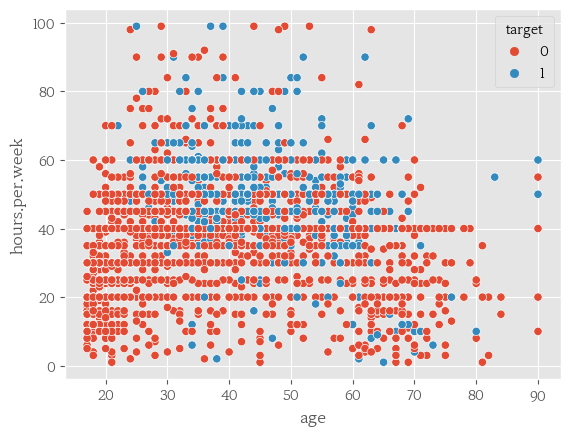

In [28]:
sns.scatterplot(data=train, x="age", y="hours.per.week", hue="target")
plt.show()

In [ ]:
#checkcode
#empty

### Inst.
Seaborn 라이브러리를 사용하여 주당 근무시간(`hours.per.week`)과 나이(`age`) 간의 관계를 시각화하는 코드입니다. 

1. **산점도 (Scatter Plot):** 산점도는 두 연속형 변수인 나이와 주당 근무시간 간의 관계를 표현합니다.   
각 점은 한 명의 개별 데이터 포인트를 나타내며, x 축은 나이를, y 축은 주당 근무시간을 나타냅니다.

2. **색상 구분 (Hue):** `hue="target"` 인자를 사용하여 개별 데이터 포인트를 소득 수준(`target`)에 따라 색으로 구분합니다.   
이렇게 함으로써 산점도 상에서 소득 수준에 따른 패턴을 파악할 수 있습니다.

주요 목적은 나이와 주당 근무시간 사이의 상관 관계를 시각화하고, 이를 소득 수준에 따라 구분하여 비교하는 것입니다.   
이를 통해 나이가 주당 근무시간에 미치는 영향과 소득 수준과의 관련성을 시각적으로 파악할 수 있습니다.

---

#### 결과 해석
target이 1인(소득 50K 초과) 데이터는 주로 주당 근무 시간(hours.per.week)이 높은 부분에 집중되어 있는 것으로 보입니다.    
이는 일반적으로 많은 시간을 일하는 사람들이 더 많은 소득을 얻는 경향성을 반영하는 것일 수 있습니다.

특히, 주당 근무 시간 30시간 이하 영역에서 target 1인 데이터의 분포가 상대적으로 희미한 것을 볼 때,   
이 범위에서 소득 50K 초과를 받는 사람들은 상대적으로 적다는 점도 확인할 수 있습니다.

### Hint.
empty

### Solution.
empty